<a href="https://colab.research.google.com/github/Joefamouze/Guessing_game/blob/master/Chapter3_deeplearning_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [10]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 2)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 2) dtype=float32, numpy=
array([[-0.02959419, -0.37100095],
       [-0.56391644, -0.15131912],
       [-1.3492861 , -0.27212662]], dtype=float32)>


In [11]:
v.assign(tf.ones((3, 2)))

<tf.Variable 'UnreadVariable' shape=(3, 2) dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

In [12]:
v.assign_add(tf.ones((3, 2)))
v

<tf.Variable 'Variable:0' shape=(3, 2) dtype=float32, numpy=
array([[2., 2.],
       [2., 2.],
       [2., 2.]], dtype=float32)>

In [20]:
input_var = tf.Variable(3)
with tf.GradientTape() as tape:
  result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
gradient

In [14]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
  tape.watch(input_const)
  result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [21]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

In [22]:
print(acceleration)

tf.Tensor(9.8, shape=(), dtype=float32)


**Creating a linear classifier**



In [23]:
import numpy as np


num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean = [0, 3],
                                          cov = [[1, 0.5], [0.5, 1]],
                                          size = num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean = [3, 0],
                                          cov = [[1, 0.5], [0.5, 1]],
                                          size = num_samples_per_class)


In [24]:
#stacking the two classes into an array with shape(2000, 2)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [27]:
# generating the corresponding targets(0 and 1)

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

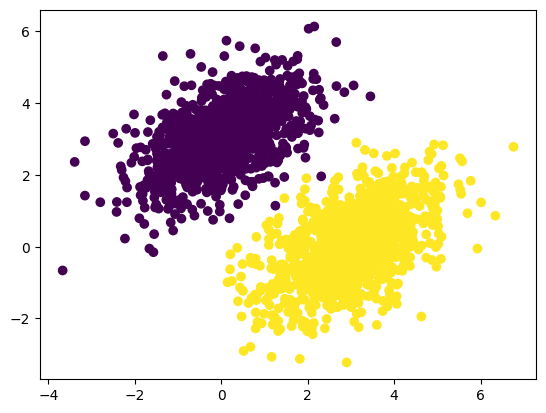

In [28]:
# ploting the two point classes

import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

The output predictions will be a single score per
sample (close to 0 if the sample is predicted to
be in class 0, and close to 1 if the sample is
predicted to be in class)

In [31]:
input_dim = 2
output_dim = 1

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))



In [32]:
def model(inputs):
  return tf.matmul(inputs, W) + b


def square_loss(targets, predictions):
  # per_sample_losses will be a tensor with the same shape as
  #targets and predictions, containing per-sample loss scores.
  per_sample_losses = tf.square(targets - predictions)
  # returns average a scalar loss value of the per_sample_losses scores
  return tf.reduce_mean(per_sample_losses)

learning_rate = 0.1


def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    # forward pass inside a gradient tape scope
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
  # Retrieve the gradientof the loss with regard to weights
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  # updates the weights
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

In [33]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 4.1745
Loss at step 1: 0.7023
Loss at step 2: 0.2241
Loss at step 3: 0.1490
Loss at step 4: 0.1302
Loss at step 5: 0.1199
Loss at step 6: 0.1114
Loss at step 7: 0.1038
Loss at step 8: 0.0969
Loss at step 9: 0.0906
Loss at step 10: 0.0848
Loss at step 11: 0.0796
Loss at step 12: 0.0748
Loss at step 13: 0.0704
Loss at step 14: 0.0664
Loss at step 15: 0.0627
Loss at step 16: 0.0594
Loss at step 17: 0.0563
Loss at step 18: 0.0535
Loss at step 19: 0.0510
Loss at step 20: 0.0487
Loss at step 21: 0.0466
Loss at step 22: 0.0446
Loss at step 23: 0.0429
Loss at step 24: 0.0413
Loss at step 25: 0.0398
Loss at step 26: 0.0385
Loss at step 27: 0.0372
Loss at step 28: 0.0361
Loss at step 29: 0.0351
Loss at step 30: 0.0342
Loss at step 31: 0.0333
Loss at step 32: 0.0325
Loss at step 33: 0.0318
Loss at step 34: 0.0312
Loss at step 35: 0.0306
Loss at step 36: 0.0300
Loss at step 37: 0.0296
Loss at step 38: 0.0291
Loss at step 39: 0.0287


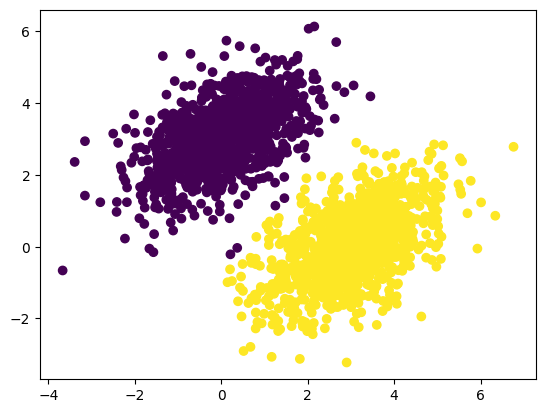

In [34]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

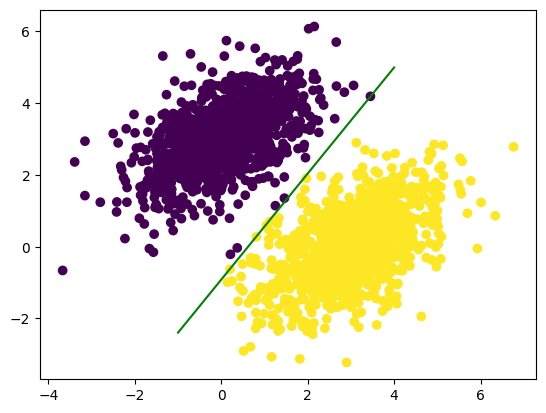

In [35]:
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-g")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)